In [21]:
import tensorflow as tf # 搭建神经网络
from tensorflow import keras #搭建神经网络
import matplotlib.pyplot as plt # 画图
import numpy as np # = matlab
import os # 路径处理
import cv2 # 计算机视觉库
from sklearn.model_selection import train_test_split # 训练集和测试集的分割

In [22]:
train_tumor_path = 'Brain tumor/yes/' # tumor 路径，yes：有肿瘤
train_no_tumor_path = 'Brain tumor/no/' #no tumor 路径，no：无肿瘤

In [23]:
train_img = [] #存储训练图像

In [24]:
# 前1500张是tumor类型
for i in os.listdir(train_tumor_path):
    read_img_path = train_tumor_path+i
    read_img = cv2.imread(read_img_path) #输入图像名称，读取图像并转化成像素值
    read_img = cv2.resize(read_img,(156,156)) #修改图像尺寸，156×156
    train_img.append(read_img)

In [25]:
# 后1500张是非tumor
for i in os.listdir(train_no_tumor_path):
    read_img_path = train_no_tumor_path+i
    read_img = cv2.imread(read_img_path)
    read_img = cv2.resize(read_img,(156,156))
    train_img.append(read_img)

In [26]:
train_img = np.array(train_img)

In [27]:
train_img[0].shape

(156, 156, 3)

In [28]:
# o定义为tumor，1定义非tumor, y
y_label = np.array([0]*1500+[1]*1500)

In [29]:
train_img,test_img, train_label, test_label = train_test_split(train_img,y_label,test_size=0.2,random_state=0) # 20%为测试集，80%为训练集

In [30]:
x_train_normalize = train_img/255 #归一化，增加训练时的优化速度

In [31]:
x_test_normalize = test_img/255 #归一化

In [39]:
#CNN：小，MobileNet属于中，VGG-16：大
base_model=tf.keras.applications.VGG16(input_shape=(156,156,3),include_top=False, weights='imagenet') # include_top:包不包含最后一层, VGG_16, MobileNet

58900480/58889256 [==============================] - 152s 3us/step


In [40]:
global_average_layer = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')

In [41]:
model = tf.keras.Sequential([base_model, global_average_layer, prediction_layer])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14,722,881
Trainable params: 14,722,881
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # 损失函数是binary_crossentropy, 优化器是adam，评价指标是accuracy

In [44]:
history=model.fit(x=x_train_normalize,y=train_label,validation_data=(x_test_normalize,test_label),epochs=30,batch_size=10,verbose=1) #前面是训练集的损失值和准确率，后面是验证集

Epoch 1/30
240/240 [==============================] - 8s 29ms/step - loss: 0.6405 - accuracy: 0.6633 - val_loss: 0.5329 - val_accuracy: 0.7333
Epoch 2/30
240/240 [==============================] - 6s 27ms/step - loss: 0.4647 - accuracy: 0.7750 - val_loss: 0.3668 - val_accuracy: 0.8300
Epoch 3/30
240/240 [==============================] - 7s 28ms/step - loss: 0.4204 - accuracy: 0.8058 - val_loss: 0.3362 - val_accuracy: 0.8583
Epoch 4/30
240/240 [==============================] - 7s 28ms/step - loss: 0.4975 - accuracy: 0.7992 - val_loss: 0.3515 - val_accuracy: 0.8533
Epoch 5/30
240/240 [==============================] - 6s 27ms/step - loss: 0.3220 - accuracy: 0.8629 - val_loss: 0.2869 - val_accuracy: 0.8750
Epoch 6/30
240/240 [==============================] - 6s 27ms/step - loss: 0.2620 - accuracy: 0.8967 - val_loss: 0.2702 - val_accuracy: 0.8867
Epoch 7/30
240/240 [==============================] - 6s 27ms/step - loss: 0.2134 - accuracy: 0.9221 - val_loss: 0.3185 - val_accuracy: 0.8833

In [45]:
history.history

{'loss': [0.6405011415481567,
  0.4647345542907715,
  0.42043206095695496,
  0.49750620126724243,
  0.3219778537750244,
  0.26199695467948914,
  0.21344700455665588,
  0.1988191157579422,
  0.1493545025587082,
  0.13386912643909454,
  0.10306694358587265,
  0.11549839377403259,
  0.07182145863771439,
  0.05042920261621475,
  0.0876796692609787,
  0.07154861092567444,
  0.0969589576125145,
  0.041948139667510986,
  0.017529623582959175,
  0.0351596362888813,
  0.06251060217618942,
  0.4296039342880249,
  0.14477714896202087,
  0.056728821247816086,
  0.022486070170998573,
  0.06364139169454575,
  0.015562755055725574,
  0.03347798064351082,
  0.01649499498307705,
  0.02369002252817154],
 'accuracy': [0.6633333563804626,
  0.7749999761581421,
  0.8058333396911621,
  0.7991666793823242,
  0.8629166483879089,
  0.8966666460037231,
  0.92208331823349,
  0.9254166483879089,
  0.9449999928474426,
  0.9491666555404663,
  0.9633333086967468,
  0.9641666412353516,
  0.9745833277702332,
  0.98124

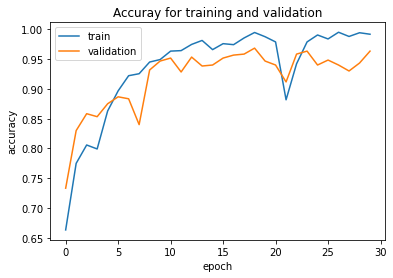

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuray for training and validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

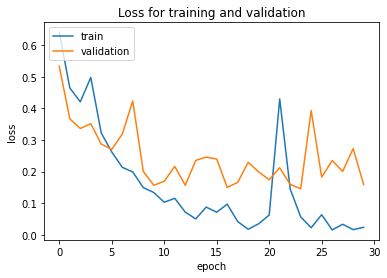

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for training and validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')